## Nedbørsoppgaven Del 2: Rydd datasettet

*Nedbørsoppgavene Del 1 til 5 er laget som støtte-oppgaver til oppgaven "Nedbør i Norge". Oppgaven "Nedbør i Norge" er en lengre oppgave som kommer innom mange forskjellige programerings-elementer. Intensjonen er at hvis man først gjør deloppgavene 1 til 5 og så går gjennom det nokså omfattende eksempelet på starten av oppgaven "Nedbør i Norge" så vil det programeringstekniske i oppgaven "Nedbør i Norge" være repetisjon, slik at man kan fokusere på den naturvitenskaplige tolkningen av dataene. På denne måten får man både trening i programmering og erfaring med hvordan det kan brukes til å studere og forstå naturvitenskaplige prosesser.*

-------------

I denne oppgaven går vi gjennom et eksempel på:
- Hvordan man kan gå frem for å få oversikten over datasettet man skal bruke, og
- Hvordan man kan rydde i det om nødvendig (og når og hvorfor det i blant er nødvendig).

Når man jobber med datasett med observasjoner fra naturen er det ofte slik at man mangler et par verdier. Har man f.eks. en gammel tidsserie over snødybde på et gitt sted kan det være at en dag mangler fordi det var storm og utrygt å gå ut for å måle snødybden. I dag har vi mange metoder for å automatisk hente inn data, men hull kan likevel oppstå i et datasett. Et skydekke vil hindre noen satellitter i å ta målinger, en alge kan legge seg over en sensor i havet og bli skylt vekk av en sterk strøm dager eller uker seinere, eller en is- eller sediment-kjerne kan knekke nettopp der du hadde tenkt å bore et hull for å måle temperatur. Mye kan skje, og det er viktig å sjekke om datasettet du skal bruke er "good to go" eller om det krever en gjennomgang før det kan brukes. 

I dette eksempelet bruker vi en tidsserie over temperatur i Bergen siden 1861. Datasettet har to kolonner: år og gjennomsnitlig års-temperatur.

#### Last inn pakkene som trengs

In [1]:
import numpy as np # for matematikk, filinnlasting mm.
import matplotlib.pyplot as plt # for figurer
from EkteDataFunk import loadData # for filinnlasting

#### 1. Last inn datasettet. 

Vi bruker funksjonen loadData som ligger i GitHub mappen til Ekte Data. Vi setter `rydd = 'N'` for at funksjonen ikke skal rydde datasettet automatisk. 


In [2]:
file='TempBergenYearly.txt'
data = loadData(file, rydd='N')


Nå er filen lastet inn, og innholdet er lagret i variabelen `data`. Vi skriver den ut for å sjekke hvordan dataene våre er strukturert.

In [3]:
data

array([[1861.        , -999.99      ],
       [1862.        ,    7.71666667],
       [1863.        ,    7.75833333],
       [1864.        ,    6.86666667],
       [1865.        ,    7.225     ],
       [1866.        ,    7.41666667],
       [1867.        ,    6.55      ],
       [1868.        ,    7.975     ],
       [1869.        ,    6.45      ],
       [1870.        ,    6.575     ],
       [1871.        , -999.99      ],
       [1872.        , -999.99      ],
       [1873.        ,    7.83333333],
       [1874.        ,    7.175     ],
       [1875.        ,    7.01666667],
       [1876.        ,    6.78333333],
       [1877.        ,    6.55      ],
       [1878.        , -999.99      ],
       [1879.        ,    6.69166667],
       [1880.        ,    7.53333333],
       [1881.        ,    6.36666667],
       [1882.        ,    7.9       ],
       [1883.        ,    7.6       ],
       [1884.        ,    8.20833333],
       [1885.        ,    6.70833333],
       [1886.        ,   

#### Oppgave 1. 
**Studer outputtet og undersøk punktene:**
- Hva beskriver kolonne en og to?
- Hvilken type dataformat er det?
- Hva er dimensjonene?
- Finnes det Nan-verdier eller andre verdier som representerer at data mangler?

For å svare på punkt 1 er det lurt å åpne filen i notepad fordi det ofte er en *header* i .txt-filer som dette. I første linje til denne filen står det *Year* og *Temperature*, altså *år* og *temperatur*. Kolonne en er år, kolonne to er nedbør. Det varierer litt fra filformat til filformat hvor informasjon som dette ligger, og det er heller ikke alltid datafiler har en tydelig header. Men stort sett er dette lett tilgjengelig informasjon, og i datasettene vi bruker her vil det alltid enten være en header, eller så vil det stå i oppgaveteksten.

Punkt 2 er hvilket format vi har. Som det står når vi printer `data` er dette et array, altså en matrise. `data.shape` gir oss dimensjonene, altså `161 x 2` (punkt 3). Matrisen `data` har 161 rader og 2 kolonner.

In [4]:
data.shape

(161, 2)

#### 2. Lagre dataene til variables
For å gjøre datasettet enklere å jobbe med lagrer vi tid-kolonnen i vektoren *tid*, og temperatur-kolonnen i vektoren *temp*.  

In [5]:
tid=data[:,0]
temp=data[:,1]

#### 3. Lag en figur
Nå som vi vet hva datasettet vårt inneholder kan vi lage en figur.

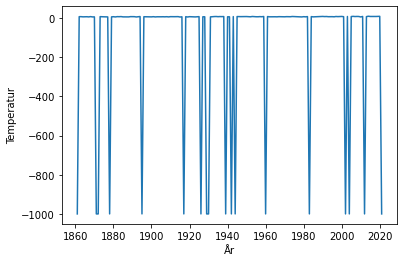

In [6]:
plt.plot(tid, temp)
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

#### 4. Fyll-verdier og behandling av fyll-verdier
Dette ser veldig rart ut. Ser vi tilbake på tabellen med dataverdier over, så ser vi at det står -999.99 flere steder. Den laveste teoretiske temperaturen man kan ha er -273.15. Dette finnes ikke naturlig, og i allefall ikke i Bergen. Disse verdiene er altså opplagt fyll-verdier som er satt inn fordi data mangler. Ved å sette inn slike verdier blir datasettet lett å jobbe med til tross for manglende verdier. Det hadde vært mye mer knotete om disse årene bare ble tatt ut. Da kunne man plutselig ha et hopp i tid fra f.eks 1923 til 1927 som man måtte identifisere før man kunne f.eks. plotte og analysere dataene. 

Dette oppsettet med fyll-verdier krever imidlertid litt opprenskning det også. Det enkleste er å sette alle steder med -999.99 til `NaN`. Da er det lett å utelukke verdiene i beregninger med numpy-pakken (np.nanmean, np.nanstd...), men det er også lett å lage figurer uten at man risikerer hopp i tid. 

#### 5. Logisk indeksering
Vi setter -999.99 til `NaN` ved hjelp av *logisk indeksering*. Logisk indeksering vil si at man setter et kriterie, og sjekker om veridene i en variabel tilfredstiller kriteriet eller ikke. Svaret et alltid *True* eller *False*. Dette kalles også *Boolean logic*. Et kort eksempel viser dette bedre:

In [7]:
x=np.array([2,4,1,5,3,6]) # et array (i dette tilfellet en vektor)
print(x)
print(x==4) # Det doble likhetstegnet betyr at vi bruker logisk indeksering: 
            # "For alle elementer i x, sjekk om ellementet er lik 4"
            # Resultatet er et array med like dimensjoner som x, men alle 
            # elementene er "True" eller "False". I dette eksempelet er kun 
            # element nr 1 "True", altså er x[1]=4. 

[2 4 1 5 3 6]
[False  True False False False False]


Dette er veldig nyttig når man skal gjøre noe med elementer som tilfredstiller et kriterie. Vil vi for eksempel at alle elementer som er 4 skal være 7 i stedet kan vi bruke den logiske rekken vår og si at der denne er "True" skal verdien byttes til 7. 

In [8]:
ind = x==4 # Lagre den logiske vektoren som en variabel "ind" (for indeks)
x[ind]=7 # Sett elementene i x der ind=True til 7
x

array([2, 7, 1, 5, 3, 6])

In [9]:
# Dette kan også komprimeres til en linje
x=np.array([2,4,1,5,3,6]) 
x[x==4]=7 # "der x=4 skal verdien byttes til 7"
x

array([2, 7, 1, 5, 3, 6])

Hvis man vil ha tak i selve indeksen kan man bruke np.where slik som vi så på i Del 1: Ideksering. 
I dette tilfelle er det imidlertid en litt mer knotete metode, men det viser at mye kan gjøres på mange ulike måter. 

In [10]:
x=np.array([2,4,1,5,3,6]) 
ind=np.where(x==4)
x[ind[0][0]]=7
x

array([2, 7, 1, 5, 3, 6])

Vi må bruke `ind[0][0]` av samme grunn som notatet i Oppgave 7 fra Del 1: Indeksering, altså for å komme på innsiden av parantesene som er rundt ind. Kjør cellen under for å se tydeligere hva som er forskjellen på `ind`, `ind[0]`, og `ind[0][0]`.

In [11]:
print(ind)
print(ind[0])
print(ind[0][0])

(array([1], dtype=int64),)
[1]
1


#### 6. Sett fyll-verdien `-999.99` til `NaN`
Vi kan bruke logisk indeksering på datasettet vårt og si at "der `x=-999.99` skal verdien byttes til `NaN`"

In [12]:
data[data==-999.99]=np.nan
tid=data[:,0]
temp=data[:,1]

In [13]:
data


array([[1861.        ,           nan],
       [1862.        ,    7.71666667],
       [1863.        ,    7.75833333],
       [1864.        ,    6.86666667],
       [1865.        ,    7.225     ],
       [1866.        ,    7.41666667],
       [1867.        ,    6.55      ],
       [1868.        ,    7.975     ],
       [1869.        ,    6.45      ],
       [1870.        ,    6.575     ],
       [1871.        ,           nan],
       [1872.        ,           nan],
       [1873.        ,    7.83333333],
       [1874.        ,    7.175     ],
       [1875.        ,    7.01666667],
       [1876.        ,    6.78333333],
       [1877.        ,    6.55      ],
       [1878.        ,           nan],
       [1879.        ,    6.69166667],
       [1880.        ,    7.53333333],
       [1881.        ,    6.36666667],
       [1882.        ,    7.9       ],
       [1883.        ,    7.6       ],
       [1884.        ,    8.20833333],
       [1885.        ,    6.70833333],
       [1886.        ,   

Hvis vi nå plotter dataene igjen får vi mye mer informasjon. All variabiliteten (høye of lave verdier, trender etc.) vi ser her fantes også i figuren over, men den ble overskygget at -999.99 verdiene. Hadde vi zoomet inn på y-aksen, f.eks. satt `plt.ylim([6,10])`, ville vi fått noe som lignet på figuren under. 

Det er noen hull i figuren under, spesielt rundt 1940, men slik er det i blant - man har ikke alltid et fullstendig datasett - og dette gir oss likevel et godt inntrykk av temperatur mellom 1860 og 2020. Man kan estimere verdier som mangler med interpolasjon, men into til dette kommer i en annen oppgave. 

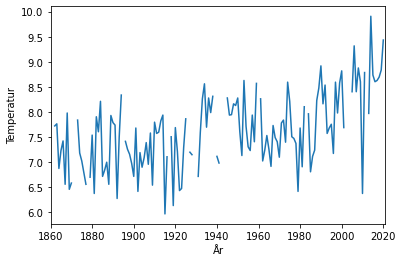

In [14]:
plt.plot(tid, temp)
plt.xlim([1860,2021])
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()

Datasettet er nå klart til at vi kan sette igang å jobbe med det. I tillegg har vi fått oversikten over dimensjonene til datasettet og hva kolonnene inneholder.
__________________________

#### Oppgave 2. 
Gitt arrayet `x` under.
Gjør slik at det istedet står `100` alle de stedene hvor det nå står `2`.

In [77]:
x=np.array([2,4,2,1,5,7,7,3,6,0,5,2,4,6,5,2,5,78,6,4,2,1,3,2,4])

ind=x==2
x[ind]=100
x

array([100,   4, 100,   1,   5,   7,   7,   3,   6,   0,   5, 100,   4,
         6,   5, 100,   5,  78,   6,   4, 100,   1,   3, 100,   4])

#### Oppgave 3. 
Gitt arrayet `x` under. Gjør slik at det står `100` alle stedene det står `7` i den andre kolonnen. Kolonne nr 1 skal ikke endre seg. 

In [73]:
x=np.array([[2,1,3,5,7,3,6,8,0,7],[2,7,8,6,5,6,8,8,7,7]])

ind=x==7
ind

y=x[1,:]
y[ind[1,:]]=100
x[1,:]=y
x

array([[  2,   1,   3,   5,   7,   3,   6,   8,   0,   7],
       [  2, 100,   8,   6,   5,   6,   8,   8, 100, 100]])

#### Or...

In [75]:
x=np.array([[2,1,3,5,7,3,6,8,0,7],[2,7,8,6,5,6,8,8,7,7]])

x[1,:][ind[1,:]]=100
x


array([[  2,   1,   3,   5,   7,   3,   6,   8,   0,   7],
       [  2, 100,   8,   6,   5,   6,   8,   8, 100, 100]])

#### Oppgave 4.
Prøv deg frem med datasettet: `PrecipVestlandYearly.txt`. Det ligner, men er ikke helt likt som det i eksempelet over.

In [44]:
file='PrecipVestlandYearly.txt'
data = loadData(file, rydd='N')


In [45]:
data

array([[1899.        , -999.99      ],
       [1900.        ,  131.85083333],
       [1901.        , -999.99      ],
       [1902.        ,  130.59833333],
       [1903.        ,  158.87166667],
       [1904.        ,  123.3425    ],
       [1905.        ,  169.73583333],
       [1906.        , -999.99      ],
       [1907.        ,  133.41916667],
       [1908.        ,  139.94583333],
       [1909.        ,  144.9425    ],
       [1910.        ,  119.28916667],
       [1911.        , -999.99      ],
       [1912.        ,  125.1475    ],
       [1913.        ,  141.995     ],
       [1914.        ,  157.14916667],
       [1915.        ,   94.88333333],
       [1916.        , -999.99      ],
       [1917.        ,  156.24083333],
       [1918.        ,  141.2825    ],
       [1919.        ,  115.72833333],
       [1920.        ,  156.05666667],
       [1921.        ,  208.91416667],
       [1922.        , -999.99      ],
       [1923.        ,  159.6625    ],
       [1924.        , -9

In [46]:
data.shape

(122, 2)

In [47]:
tid=data[:,0]
nedbør=data[:,1]

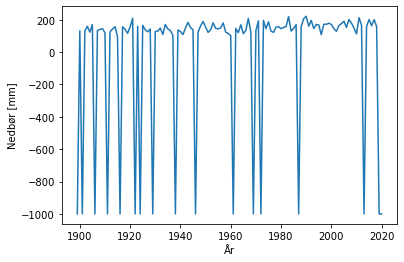

In [48]:
plt.plot(tid, nedbør)
plt.xlabel('År')
plt.ylabel('Nedbør [mm]')
plt.show()

#### En mulighet:
Noter at man ikke trenger å sette tid-verdiene til NaN, det holder at f(t) verdien er nan. 

In [28]:
nedbør==-999.99

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True])

In [30]:
ind=nedbør==-999.99
ind

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True])

In [34]:
nedbør[ind]=np.nan
nedbør

array([         nan, 131.85083333,          nan, 130.59833333,
       158.87166667, 123.3425    , 169.73583333,          nan,
       133.41916667, 139.94583333, 144.9425    , 119.28916667,
                nan, 125.1475    , 141.995     , 157.14916667,
        94.88333333,          nan, 156.24083333, 141.2825    ,
       115.72833333, 156.05666667, 208.91416667,          nan,
       159.6625    ,          nan, 165.09      , 138.43333333,
       124.92583333, 142.93333333,          nan, 127.73583333,
       129.60333333, 148.23166667, 108.56583333, 170.41416667,
       142.90333333, 133.45833333, 103.56166667,          nan,
       136.33583333, 127.64333333, 108.1275    , 147.92166667,
       183.8075    , 150.965     , 139.02      ,          nan,
       123.2275    , 160.6775    , 189.3425    , 154.77083333,
       121.585     , 137.65916667, 181.02583333, 146.7025    ,
       143.2025    , 150.15666667, 180.0525    , 123.49916667,
       114.83666667, 101.56666667,          nan, 145.51

#### En annen mulighet

In [42]:
nedbør[nedbør==-999.99]=np.nan
nedbør

array([         nan, 131.85083333,          nan, 130.59833333,
       158.87166667, 123.3425    , 169.73583333,          nan,
       133.41916667, 139.94583333, 144.9425    , 119.28916667,
                nan, 125.1475    , 141.995     , 157.14916667,
        94.88333333,          nan, 156.24083333, 141.2825    ,
       115.72833333, 156.05666667, 208.91416667,          nan,
       159.6625    ,          nan, 165.09      , 138.43333333,
       124.92583333, 142.93333333,          nan, 127.73583333,
       129.60333333, 148.23166667, 108.56583333, 170.41416667,
       142.90333333, 133.45833333, 103.56166667,          nan,
       136.33583333, 127.64333333, 108.1275    , 147.92166667,
       183.8075    , 150.965     , 139.02      ,          nan,
       123.2275    , 160.6775    , 189.3425    , 154.77083333,
       121.585     , 137.65916667, 181.02583333, 146.7025    ,
       143.2025    , 150.15666667, 180.0525    , 123.49916667,
       114.83666667, 101.56666667,          nan, 145.51

#### En tredje mulighet:

In [49]:
data[data==-999.99]=np.nan
nedbør=data[:,1]

In [50]:
nedbør

array([         nan, 131.85083333,          nan, 130.59833333,
       158.87166667, 123.3425    , 169.73583333,          nan,
       133.41916667, 139.94583333, 144.9425    , 119.28916667,
                nan, 125.1475    , 141.995     , 157.14916667,
        94.88333333,          nan, 156.24083333, 141.2825    ,
       115.72833333, 156.05666667, 208.91416667,          nan,
       159.6625    ,          nan, 165.09      , 138.43333333,
       124.92583333, 142.93333333,          nan, 127.73583333,
       129.60333333, 148.23166667, 108.56583333, 170.41416667,
       142.90333333, 133.45833333, 103.56166667,          nan,
       136.33583333, 127.64333333, 108.1275    , 147.92166667,
       183.8075    , 150.965     , 139.02      ,          nan,
       123.2275    , 160.6775    , 189.3425    , 154.77083333,
       121.585     , 137.65916667, 181.02583333, 146.7025    ,
       143.2025    , 150.15666667, 180.0525    , 123.49916667,
       114.83666667, 101.56666667,          nan, 145.51

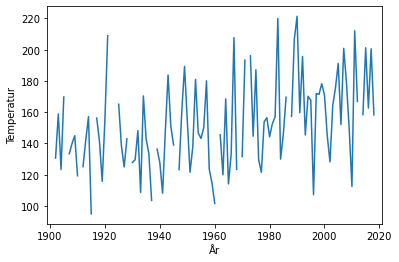

In [52]:
plt.plot(tid, nedbør)
plt.xlim([tid[0],2021])
plt.xlabel('År')
plt.ylabel('Temperatur')
plt.show()